## Logistic Regression

In [65]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

from sklearn.metrics import plot_confusion_matrix, roc_curve, auc,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('diabetes.csv')
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

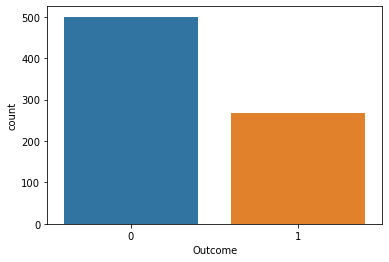

In [6]:
sns.countplot(x=df['Outcome']) # categorical variable

In [ ]:
df.head()

## Train test split

In [7]:
x = df.drop('Outcome',axis=1)
y = df['Outcome'] # 0 and 1

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1, stratify=y)

In [9]:
y_train.value_counts() # 0.65, 0.34, 401/213 >> 400/214 >> 0.6514/0.34

0    400
1    214
Name: Outcome, dtype: int64

In [10]:
y_test.value_counts() # 99/55 >> 100/54 >> 0.649/0.35

0    100
1     54
Name: Outcome, dtype: int64

In [ ]:
# 100/(100+54) # 0.64
# 54/(100+54)  ## 0.35

## Model Training

In [11]:
lg_model = LogisticRegression()
lg_model.fit(x_train,y_train)

LogisticRegression()

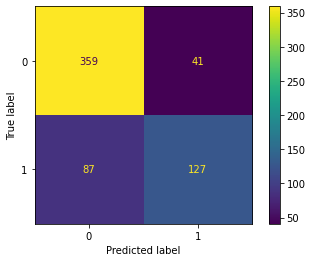

In [15]:
plot_confusion_matrix(lg_model, x_train, y_train)

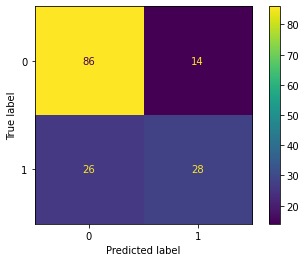

In [14]:
plot_confusion_matrix(lg_model, x_test, y_test)

## Evaluation

In [19]:
y_pred = lg_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is:\n', cnf_matrix)

print('*'*90)
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_test, y_pred)
print('\nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[86 14]
 [26 28]]
******************************************************************************************
Accuracy Score is:  0.7402597402597403
******************************************************************************************

Classification Report is :
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       100
           1       0.67      0.52      0.58        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154



In [17]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [18]:
y_pred_prob = lg_model.predict_proba(x_test)
y_pred_prob    

array([[0.9288057 , 0.0711943 ],
       [0.80820816, 0.19179184],
       [0.94377858, 0.05622142],
       [0.62022117, 0.37977883],
       [0.70770992, 0.29229008],
       [0.67799044, 0.32200956],
       [0.95961435, 0.04038565],
       [0.87336718, 0.12663282],
       [0.17934342, 0.82065658],
       [0.93034378, 0.06965622],
       [0.78901138, 0.21098862],
       [0.92781119, 0.07218881],
       [0.42841698, 0.57158302],
       [0.96433098, 0.03566902],
       [0.94717873, 0.05282127],
       [0.71535569, 0.28464431],
       [0.74347304, 0.25652696],
       [0.58068304, 0.41931696],
       [0.83809462, 0.16190538],
       [0.34252201, 0.65747799],
       [0.14754468, 0.85245532],
       [0.87542273, 0.12457727],
       [0.66601797, 0.33398203],
       [0.89848676, 0.10151324],
       [0.8539331 , 0.1460669 ],
       [0.72440243, 0.27559757],
       [0.63433867, 0.36566133],
       [0.88735089, 0.11264911],
       [0.9582217 , 0.0417783 ],
       [0.88038289, 0.11961711],
       [0.

In [20]:
# Evaluation for training
y_pred_train = lg_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix is:\n', cnf_matrix)

print('*'*90)
acc = accuracy_score(y_train,y_pred_train)
print('Accuracy Score is: ', acc)
print('*'*90)

clf_report = classification_report(y_train,y_pred_train)
print('\nClassification Report is :\n', clf_report)

Confusion Matrix is:
 [[359  41]
 [ 87 127]]
******************************************************************************************
Accuracy Score is:  0.7915309446254072
******************************************************************************************

Classification Report is :
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       400
           1       0.76      0.59      0.66       214

    accuracy                           0.79       614
   macro avg       0.78      0.75      0.76       614
weighted avg       0.79      0.79      0.78       614



In [22]:
# y_pred_prob[:,1]

In [44]:
y_pred_train_prob = lg_model.predict_proba(x_train)
y_pred_train_prob

array([[0.68127273, 0.31872727],
       [0.18556568, 0.81443432],
       [0.86075534, 0.13924466],
       ...,
       [0.44005473, 0.55994527],
       [0.52849612, 0.47150388],
       [0.03185441, 0.96814559]])

In [47]:
y_pred_train_prob[:,1].shape

(614,)

In [63]:
fpr, tpr,_= roc_curve(y_train,y_pred_train_prob[:,1])
thresh.shape

(189,)

In [67]:
roc_auc_score(y_train,y_pred_train_prob[:,1])

0.8354789719626168

In [68]:
auc(fpr,tpr)

0.8354789719626168

Text(0.5, 1.0, 'Receiver Operating Characteristic Curve')

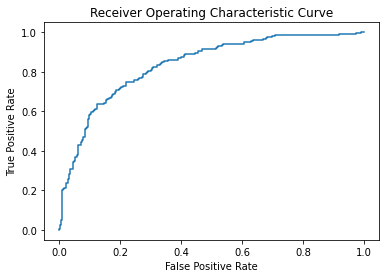

In [64]:
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')